In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
import seaborn as sn

#to supress Warnings 
import warnings
warnings.filterwarnings("ignore")

In [6]:
#stopwords

In [7]:
#import nltk
#nltk.download('stopwords')

In [8]:
#NLP
from nltk.corpus import stopwords
#stop = set(stopwords.words('english'))
#stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','']) # remove it if you need punctuation 
from nltk.stem import WordNetLemmatizer

In [9]:
from PIL import Image
#from termcolor import colored

# Read data:

In [73]:
%pwd

'C:\\Users\\elh\\Desktop\\data\\Resolution'

In [86]:
data = pd.read_csv('..//food_coded.csv')
data.shape

(125, 61)

In [75]:
data.head(1)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


# Excluding open ended columns

In [300]:
def Clean(df,feature,feature_type,fill_with ='mean'):
    
    def remove_point(x):
        if x =='.':
            return ''
        else:
            return x
    
    if df[feature].dtype == object :
        df[feature] = df[feature].str.replace('[a-z]|[A-Z]|\,|\"|\;|\'|\s','')
        df[feature] = df[feature].apply(remove_point)
        df[feature].replace(to_replace='',value=0,inplace=True)
        print('In "'+str(feature)+'" feature some non sens words were deleted')
        
    if df[feature].isnull().any():
        df[feature].fillna(0,inplace=True)
        print('In "'+str(feature)+'" feature some nan value were replaced by the '+ str(fill_with))
    
    else:
        print('"'+str(feature)+'" feature was already cleaned!')
        
    df[feature] = df[feature].astype(feature_type)
    mean = round(df[feature].mean(),3) if fill_with =='mean' else round(df[feature].median(),3)
    df[feature].replace(to_replace=0,value=mean,inplace=True) 
    
    if feature == 'weight':
         df[feature] = df[feature].apply(lambda x : round(x/2.205,3))
        
    
    return df

In [301]:
def All_no_nlp_clean(data):
    open_ended_columns = ['comfort_food','comfort_food_reasons','diet_current','eating_changes','father_profession','mother_profession','fav_cuisine','food_childhood','healthy_meal','ideal_diet','meals_dinner_friend','type_sports']
    df_no_nlp = data.drop(open_ended_columns,axis=1)
    features = df_no_nlp.columns
    n =len(features)
    for i,f in enumerate(features):
        print('-----'+str(i+1)+'th feature begins out of '+str(n)+' features-----')
        df_no_nlp = Clean(df_no_nlp,f,'float','mean')
        
    return df_no_nlp

In [302]:
data = pd.read_csv('..//food_coded.csv')
data.shape

(125, 61)

In [303]:
#df = Clean(data,'Gender','float','mean')

In [309]:
df = All_no_nlp_clean(data)

-----1th feature begins out of 49 features-----
In "GPA" feature some non sens words were deleted
In "GPA" feature some nan value were replaced by the mean
-----2th feature begins out of 49 features-----
"Gender" feature was already cleaned!
-----3th feature begins out of 49 features-----
"breakfast" feature was already cleaned!
-----4th feature begins out of 49 features-----
"calories_chicken" feature was already cleaned!
-----5th feature begins out of 49 features-----
In "calories_day" feature some nan value were replaced by the mean
-----6th feature begins out of 49 features-----
In "calories_scone" feature some nan value were replaced by the mean
-----7th feature begins out of 49 features-----
"coffee" feature was already cleaned!
-----8th feature begins out of 49 features-----
In "comfort_food_reasons_coded" feature some nan value were replaced by the mean
-----9th feature begins out of 49 features-----
In "cook" feature some nan value were replaced by the mean
-----10th feature b

In [305]:
df.shape

(125, 49)

In [307]:
#df.head(18)

# Correlation Matrix 

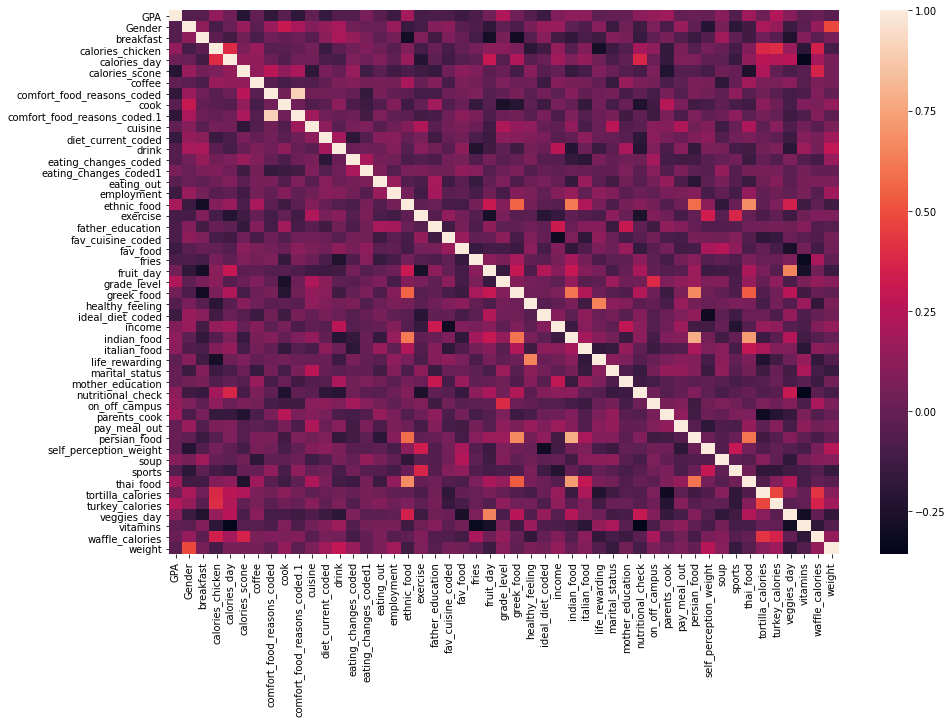

In [310]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sn.heatmap(df.corr())

***delete one columns: see correlation***